My very $1^{st}$ iPython Notebook



In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import gc

In [2]:
#Read input csv
data = pd.read_csv('./data/train.csv', converters={'Cabin': str, 'SibSp': str})

In [3]:
#Dataset meta-information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null object
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [4]:
#Print some sample rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [5]:
#Descriptive statistics for numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


In [6]:
data['Age'].fillna(data['Age'].median(), inplace=True)

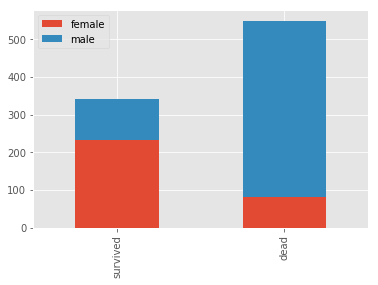

In [7]:
survived = data[data['Survived'].isin([1])]
dead = data[data['Survived'].isin([0])]

survived_Sex = survived['Sex'].value_counts()
dead_Sex = dead['Sex'].value_counts()
df = pd.DataFrame([survived_Sex, dead_Sex])

df.index = ['survived','dead']
df.plot(kind='bar',stacked='True')

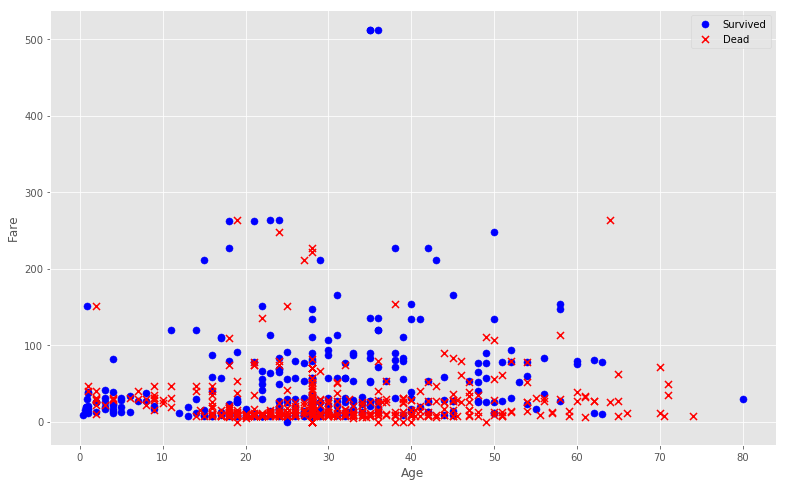

In [8]:
fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(survived['Age'], survived['Fare'] , s=50, c='b', marker='o', label='Survived')
ax.scatter(dead['Age'], dead['Fare'] , s=50, c='r', marker='x', label='Dead')
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

In [ ]:
#Insert column of ones
data.insert(0, 'Ones', 1)

In [11]:
cols = list(data)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Ones')))
cols.insert(1, cols.pop(cols.index('Age')))
cols.insert(2, cols.pop(cols.index('Fare')))
cols.insert(3, cols.pop(cols.index('Survived')))

# use ix to reorder
data = data.ix[:, cols]
data

,Ones,Age,Fare,Survived,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,1,22.0,7.2500,0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,,S
1,1,38.0,71.2833,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,1,26.0,7.9250,1,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,,S
3,1,35.0,53.1000,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S
4,1,35.0,8.0500,0,5,3,"Allen, Mr. William Henry",male,0,0,373450,,S
5,1,28.0,8.4583,0,6,3,"Moran, Mr. James",male,0,0,330877,,Q
6,1,54.0,51.8625,0,7,1,"McCarthy, Mr. Timothy J",male,0,0,17463,E46,S
7,1,2.0,21.0750,0,8,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,,S
8,1,27.0,11.1333,1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,,S
9,1,14.0,30.0708,1,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,,C


In [12]:
#define sigmoid function for logistic regression
#converts continuous input into a value between zero and one

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [13]:
#Define cost function for logistic regression
def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [14]:
#Set up data for logistic regression
cols = data.shape[1]

X = data.iloc[:,0:3]
y = data.iloc[:,3:4]

X = np.array(X.values)
y = np.array(y.values)

theta = np.zeros(3)

In [15]:
X.shape, theta.shape, y.shape

((891, 3), (3,), (891, 1))

In [16]:
cost(theta, X, y)

0.69314718055994529

In [17]:
#Define function to calculate gradient step
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [18]:
#optimize paramaters given functions to compute the cost & the gradients
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
cost(result[0], X, y)

0.62206032816334822

In [41]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
cont_Predictions = sigmoid(X * theta_min.T)
#predictions = predict(theta_min, X) 

#correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
#accuracy = (sum(map(int, correct)) / len(correct))  
#print(accuracy)  

In [42]:
data.insert(4, 'cont_Prediction', cont_Predictions)

In [ ]:
data

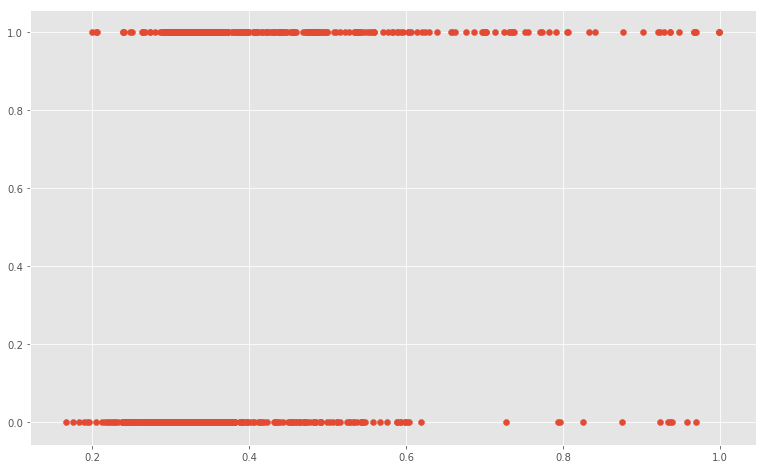

In [46]:
fig, ax = plt.subplots(figsize=(13,8))
plt.scatter(data['cont_Prediction'], data['Survived'],'r')

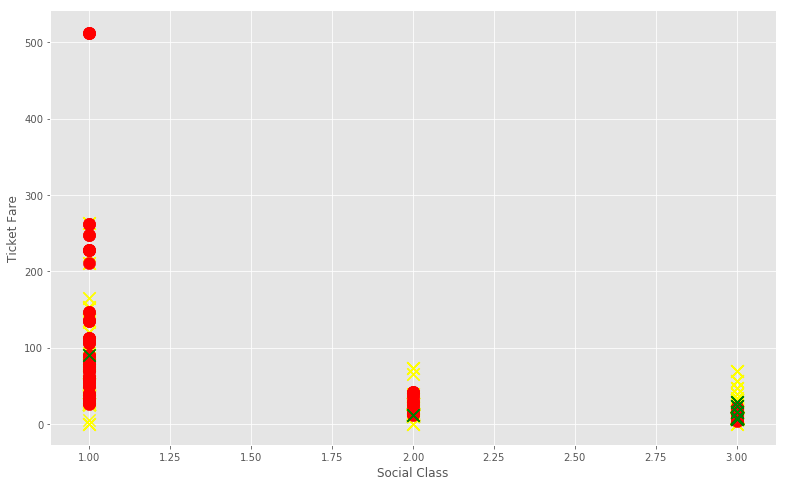

In [25]:
figure=plt.figure(figsize=(13,8))
plt.scatter(data[data['Embarked']=='S']['Pclass'],data[data['Embarked']=='S']['Fare'], marker = 'x', s=150, color = 'yellow')
plt.scatter(data[data['Embarked']=='C']['Pclass'],data[data['Embarked']=='C']['Fare'], marker = 'o', s=150, color = 'red')
plt.scatter(data[data['Embarked']=='Q']['Pclass'],data[data['Embarked']=='Q']['Fare'], marker = 'x', s=150, color = 'green')
plt.xlabel('Social Class')
plt.ylabel('Ticket Fare')


In [11]:
def status(feature):

    print('Processing',feature,': ok')

In [12]:
def get_combined_data():
    train = pd.read_csv('./data/train.csv', converters={'Cabin': str, 'SibSp': str})
    
    test = pd.read_csv('./data/test.csv', converters={'Cabin': str, 'SibSp': str})
    
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [13]:
combined = get_combined_data()

In [14]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [15]:
combined.describe()

,PassengerId,Pclass,Age,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.385027,33.295479
std,378.020061,0.837836,14.413493,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,9.000000,512.329200


In [16]:
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Nobility",
                        "Don":        "Nobility",
                        "Sir" :       "Nobility",
                        "Dr":         "Doctor",
                        "Rev":        "Clergy",
                        "the Countess":"Nobility",
                        "Dona":       "Nobility",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Nobility"
                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

In [17]:
get_titles()

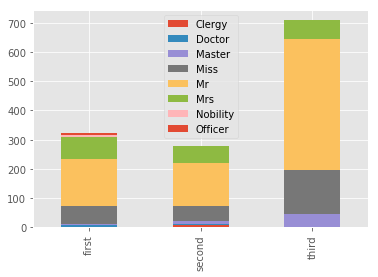

In [18]:
firstClass_Title = combined[combined['Pclass']==1]['Title'].value_counts()
secondClass_Title = combined[combined['Pclass']==2]['Title'].value_counts()
thirdClass_Title = combined[combined['Pclass']==3]['Title'].value_counts()
df = pd.DataFrame([firstClass_Title, secondClass_Title, thirdClass_Title])
df.index = ['first','second', 'third']
df.plot(kind='bar',stacked='True')

In [19]:
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)

In [20]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null object
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 122.8+ KB


In [26]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  Parch      Fare
Sex    Pclass Title                                       
female 1      Doctor          797.0  49.0    0.0   25.9292
              Miss            529.5  30.0    0.0   99.9625
              Mrs             853.5  45.0    0.0   78.1125
              Nobility        760.0  39.0    0.0   86.5000
       2      Miss            606.5  20.0    0.0   20.2500
              Mrs             533.0  30.0    0.0   26.0000
       3      Miss            603.5  18.0    0.0    8.0500
              Mrs             668.5  31.0    1.0   15.5000
male   1      Doctor          661.0  47.0    0.0   81.8583
              Master          803.0   6.0    2.0  134.5000
              Mr              634.0  41.5    0.0   47.1000
              Nobility        600.0  40.0    0.0   27.7208
              Officer         695.0  53.0    0.0   30.5000
       2      Clergy          738.0  41.5    0.0   13.0000
              Doctor          358.5  38.5    0.0   12.2500
              Master          550.0   2.0    1.0   26.0000
              Mr              723.5  30.0    0.0   13.0000
       3      Master          789.0   6.0    1.0   22.3583
              Mr              640.5  26.0    0.0    7.8958

In [27]:
grouped['Age','Fare'].median() 

Age      Fare
Sex    Pclass Title                   
female 1      Doctor    49.0   25.9292
              Miss      30.0   99.9625
              Mrs       45.0   78.1125
              Nobility  39.0   86.5000
       2      Miss      20.0   20.2500
              Mrs       30.0   26.0000
       3      Miss      18.0    8.0500
              Mrs       31.0   15.5000
male   1      Doctor    47.0   81.8583
              Master     6.0  134.5000
              Mr        41.5   47.1000
              Nobility  40.0   27.7208
              Officer   53.0   30.5000
       2      Clergy    41.5   13.0000
              Doctor    38.5   12.2500
              Master     2.0   26.0000
              Mr        30.0   13.0000
       3      Master     6.0   22.3583
              Mr        26.0    7.8958

In [22]:
def get_titles_training():

    global data
    
    # we extract the title from each name
    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Nobility",
                        "Don":        "Nobility",
                        "Sir" :       "Nobility",
                        "Dr":         "Doctor",
                        "Rev":        "Clergy",
                        "the Countess":"Nobility",
                        "Dona":       "Nobility",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Nobility"
                        }
    
    # we map each title
    data['Title'] = data.Title.map(Title_Dictionary)

In [23]:
get_titles_training()

In [30]:
groupTraining = data.groupby(['Sex','Pclass','Title'])
groupTraining.median()

PassengerId  Survived   Age  Parch       Fare
Sex    Pclass Title                                                  
female 1      Doctor          797.0       1.0  49.0    0.0   25.92920
              Miss            369.0       1.0  30.0    0.0   88.25000
              Mrs             499.0       1.0  40.0    0.0   79.20000
              Nobility        658.5       1.0  40.5    0.0   63.05000
       2      Miss            437.5       1.0  24.0    0.0   13.00000
              Mrs             439.5       1.0  31.5    0.0   26.00000
       3      Miss            372.0       0.5  18.0    0.0    8.75625
              Mrs             405.5       0.5  31.0    1.0   15.97500
male   1      Doctor          647.0       0.5  44.0    0.0   64.80000
              Master          446.0       1.0   4.0    2.0  120.00000
              Mr              463.0       0.0  40.0    0.0   42.40000
              Nobility        600.0       0.0  40.0    0.0   27.72080
              Officer         648.0       0.0  56.0    0.0   30.50000
       2      Clergy          438.5       0.0  46.5    0.0   13.00000
              Doctor          358.5       0.0  38.5    0.0   12.25000
              Master          408.0       1.0   1.0    1.0   26.00000
              Mr              440.0       0.0  31.0    0.0   13.00000
       3      Master          270.5       0.0   4.0    1.0   28.51250
              Mr              472.0       0.0  26.0    0.0    7.89580

In [32]:
groupTraining['Name'].count() 

Sex     Pclass  Title   
female  1       Doctor        1
                Miss         48
                Mrs          43
                Nobility      2
        2       Miss         34
                Mrs          42
        3       Miss        102
                Mrs          42
male    1       Doctor        4
                Master        3
                Mr          107
                Nobility      3
                Officer       5
        2       Clergy        6
                Doctor        2
                Master        9
                Mr           91
        3       Master       28
                Mr          319
Name: Name, dtype: int64

In [33]:
groupTraining['Survived'].count()

Sex     Pclass  Title   
female  1       Doctor        1
                Miss         48
                Mrs          43
                Nobility      2
        2       Miss         34
                Mrs          42
        3       Miss        102
                Mrs          42
male    1       Doctor        4
                Master        3
                Mr          107
                Nobility      3
                Officer       5
        2       Clergy        6
                Doctor        2
                Master        9
                Mr           91
        3       Master       28
                Mr          319
Name: Survived, dtype: int64

In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null object
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB
